In [1]:
import os
import nltk
from keybert import KeyBERT
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
# Change working directory
os.chdir('..')

# Import NewsDataLoader and configuration
from src.loader import NewsDataLoader
from src.config import cfg

# Import utility functions
import src.utils as utils


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Namespace(output='news_output.csv', path='data', news='rating.csv', traffic='trafiic.csv', domain='domains_location.csv')
Output File: news_output.csv
Path: data
News Data: rating.csv
Traffic Data: trafiic.csv
Domain Location Data: domains_location.csv


In [4]:
# Load data
data_loader = NewsDataLoader(cfg.path)
data_df = data_loader.get_news_data()
traffic_data = data_loader.get_traffic_data()
domains_df = data_loader.get_domain_location_data()
data = data_df.head(1000)

In [3]:
# Define KeyBERT model (adjust parameters as needed)
keybert = KeyBERT()


In [7]:
documents = data['content'].tolist()
titles = data['title'].tolist()


In [8]:
# Extract keywords from headlines
title_keywords = [keybert.extract_keywords(doc, top_n=5) for doc in titles]

# Extract keywords from news bodies
content_keywords = [keybert.extract_keywords(doc, top_n=5) for doc in documents]


In [9]:
from collections import Counter

def jaccard_similarity(set1, set2):
  intersection = len(set(set1) & set(set2))
  union = len(set(set1) | set(set2))
  return intersection / float(union) if union else 0

# Calculate Jaccard similarity for each title-content pair
jaccard_similarities = [jaccard_similarity(set(kws[0]), set(kws[1])) for kws in zip(title_keywords, content_keywords)]


In [10]:
# Calculate overlap count for each title-content pair
overlap_counts = [len(set(kws[0]) & set(kws[1])) for kws in zip(title_keywords, content_keywords)]


Average Jaccard similarity: 0.0001111111111111111


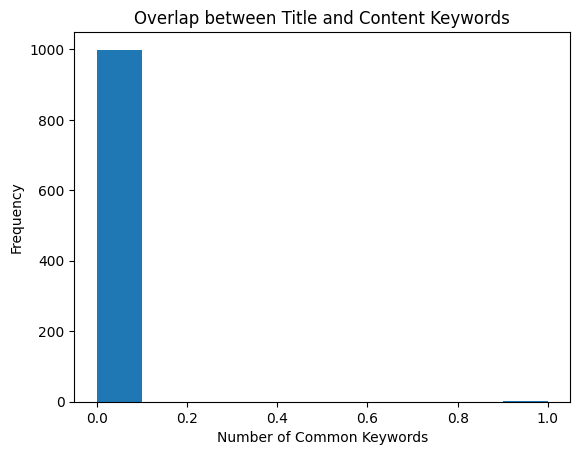

In [11]:
# Print average Jaccard similarity
print(f"Average Jaccard similarity: {sum(jaccard_similarities) / len(jaccard_similarities)}")

# Plot the distribution of overlap counts (optional)
import matplotlib.pyplot as plt

plt.hist(overlap_counts)
plt.xlabel("Number of Common Keywords")
plt.ylabel("Frequency")
plt.title("Overlap between Title and Content Keywords")
plt.show()


In [12]:
import matplotlib.pyplot as plt
from collections import Counter

In [13]:
# Drop duplicates
data_df.drop_duplicates(inplace=True)
domains_df.drop_duplicates(inplace=True)
traffic_data.drop_duplicates(inplace=True)


In [16]:
if 'source_id' in data_df.columns:
    data_df.drop(columns=['source_id'], inplace=True)

if 'url_to_image' in data_df.columns:
    data_df.drop(columns=['url_to_image'], inplace=True)

# Drop rows with missing values
data_df = data_df.dropna(axis=0)
domain_locations_df = domains_df.dropna(axis=0)

print(data_df.columns)
print(traffic_data.columns)
print(domain_locations_df.columns)

merge_df=pd.merge(data_df, domain_locations_df ,left_on='source_name', right_on='SourceCommonName', how='left')
merge_df=pd.merge(merge_df, traffic_data , left_on ='source_name' ,right_on='Domain' ,how ='left')

merge_df = merge_df.head(2000)

Index(['article_id', 'source_name', 'author', 'title', 'description', 'url',
       'published_at', 'content', 'category', 'article', 'title_sentiment'],
      dtype='object')
Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')
Index(['SourceCommonName', 'location', 'Country'], dtype='object')


In [17]:
model = KeyBERT()



In [18]:
def extract_keywords(text):
    return model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=5)

merge_df['title_keywords'] = merge_df['title'].apply(extract_keywords)
merge_df['content_keywords'] = merge_df['content'].apply(extract_keywords)




In [20]:

all_title_keywords = [keyword for keywords in merge_df['title_keywords'] for keyword in keywords]
all_content_keywords = [keyword for keywords in merge_df['content_keywords'] for keyword in keywords]

title_keyword_counts = Counter(all_title_keywords)
content_keyword_counts = Counter(all_content_keywords)

sorted_title_keywords = sorted(title_keyword_counts.items(), key=lambda x: x[1], reverse=True)
sorted_content_keywords = sorted(content_keyword_counts.items(), key=lambda x: x[1], reverse=True)

[(('european', 0.2645), 2), (('2023', 0.4181), 2), (('europe', 0.3873), 2), (('brera', 0.5372), 2), (('mongolian', 0.3419), 2), (('ilch', 0.3021), 2), (('league', 0.2958), 2), (('branding', 0.2945), 2), (('myanmar', 0.5337), 2), (('waste', 0.4731), 2), (('plastic', 0.2918), 2), (('licence', 0.2092), 2), (('dumped', 0.18), 2), (('flooding', 0.5373), 2), (('myanmar', 0.5167), 2), (('people', 0.2124), 2), (('000', 0.143), 2), (('displaces', 0.1408), 2), (('military', 0.2306), 2), (('asia', 0.5611), 2), (('ap', 0.5037), 2), (('pictures', 0.3532), 2), (('week', 0.3281), 2), (('mozambique', 0.4384), 2), (('eagles', 0.6854), 2), (('afcon', 0.5839), 2), (('today', 0.3177), 2), (('opponents', 0.2836), 2), (('know', 0.2189), 2), (('gmr', 0.4374), 2), (('hyderabad', 0.4028), 2), (('airports', 0.3762), 2), (('airport', 0.3572), 2), (('affiliates', 0.3409), 2), (('battle', 0.3508), 2), (('nigeria', 0.5009), 2), (('ousted', 0.2642), 2), (('niger', 0.5232), 2), (('order', 0.3063), 2), (('rulers', 0.2

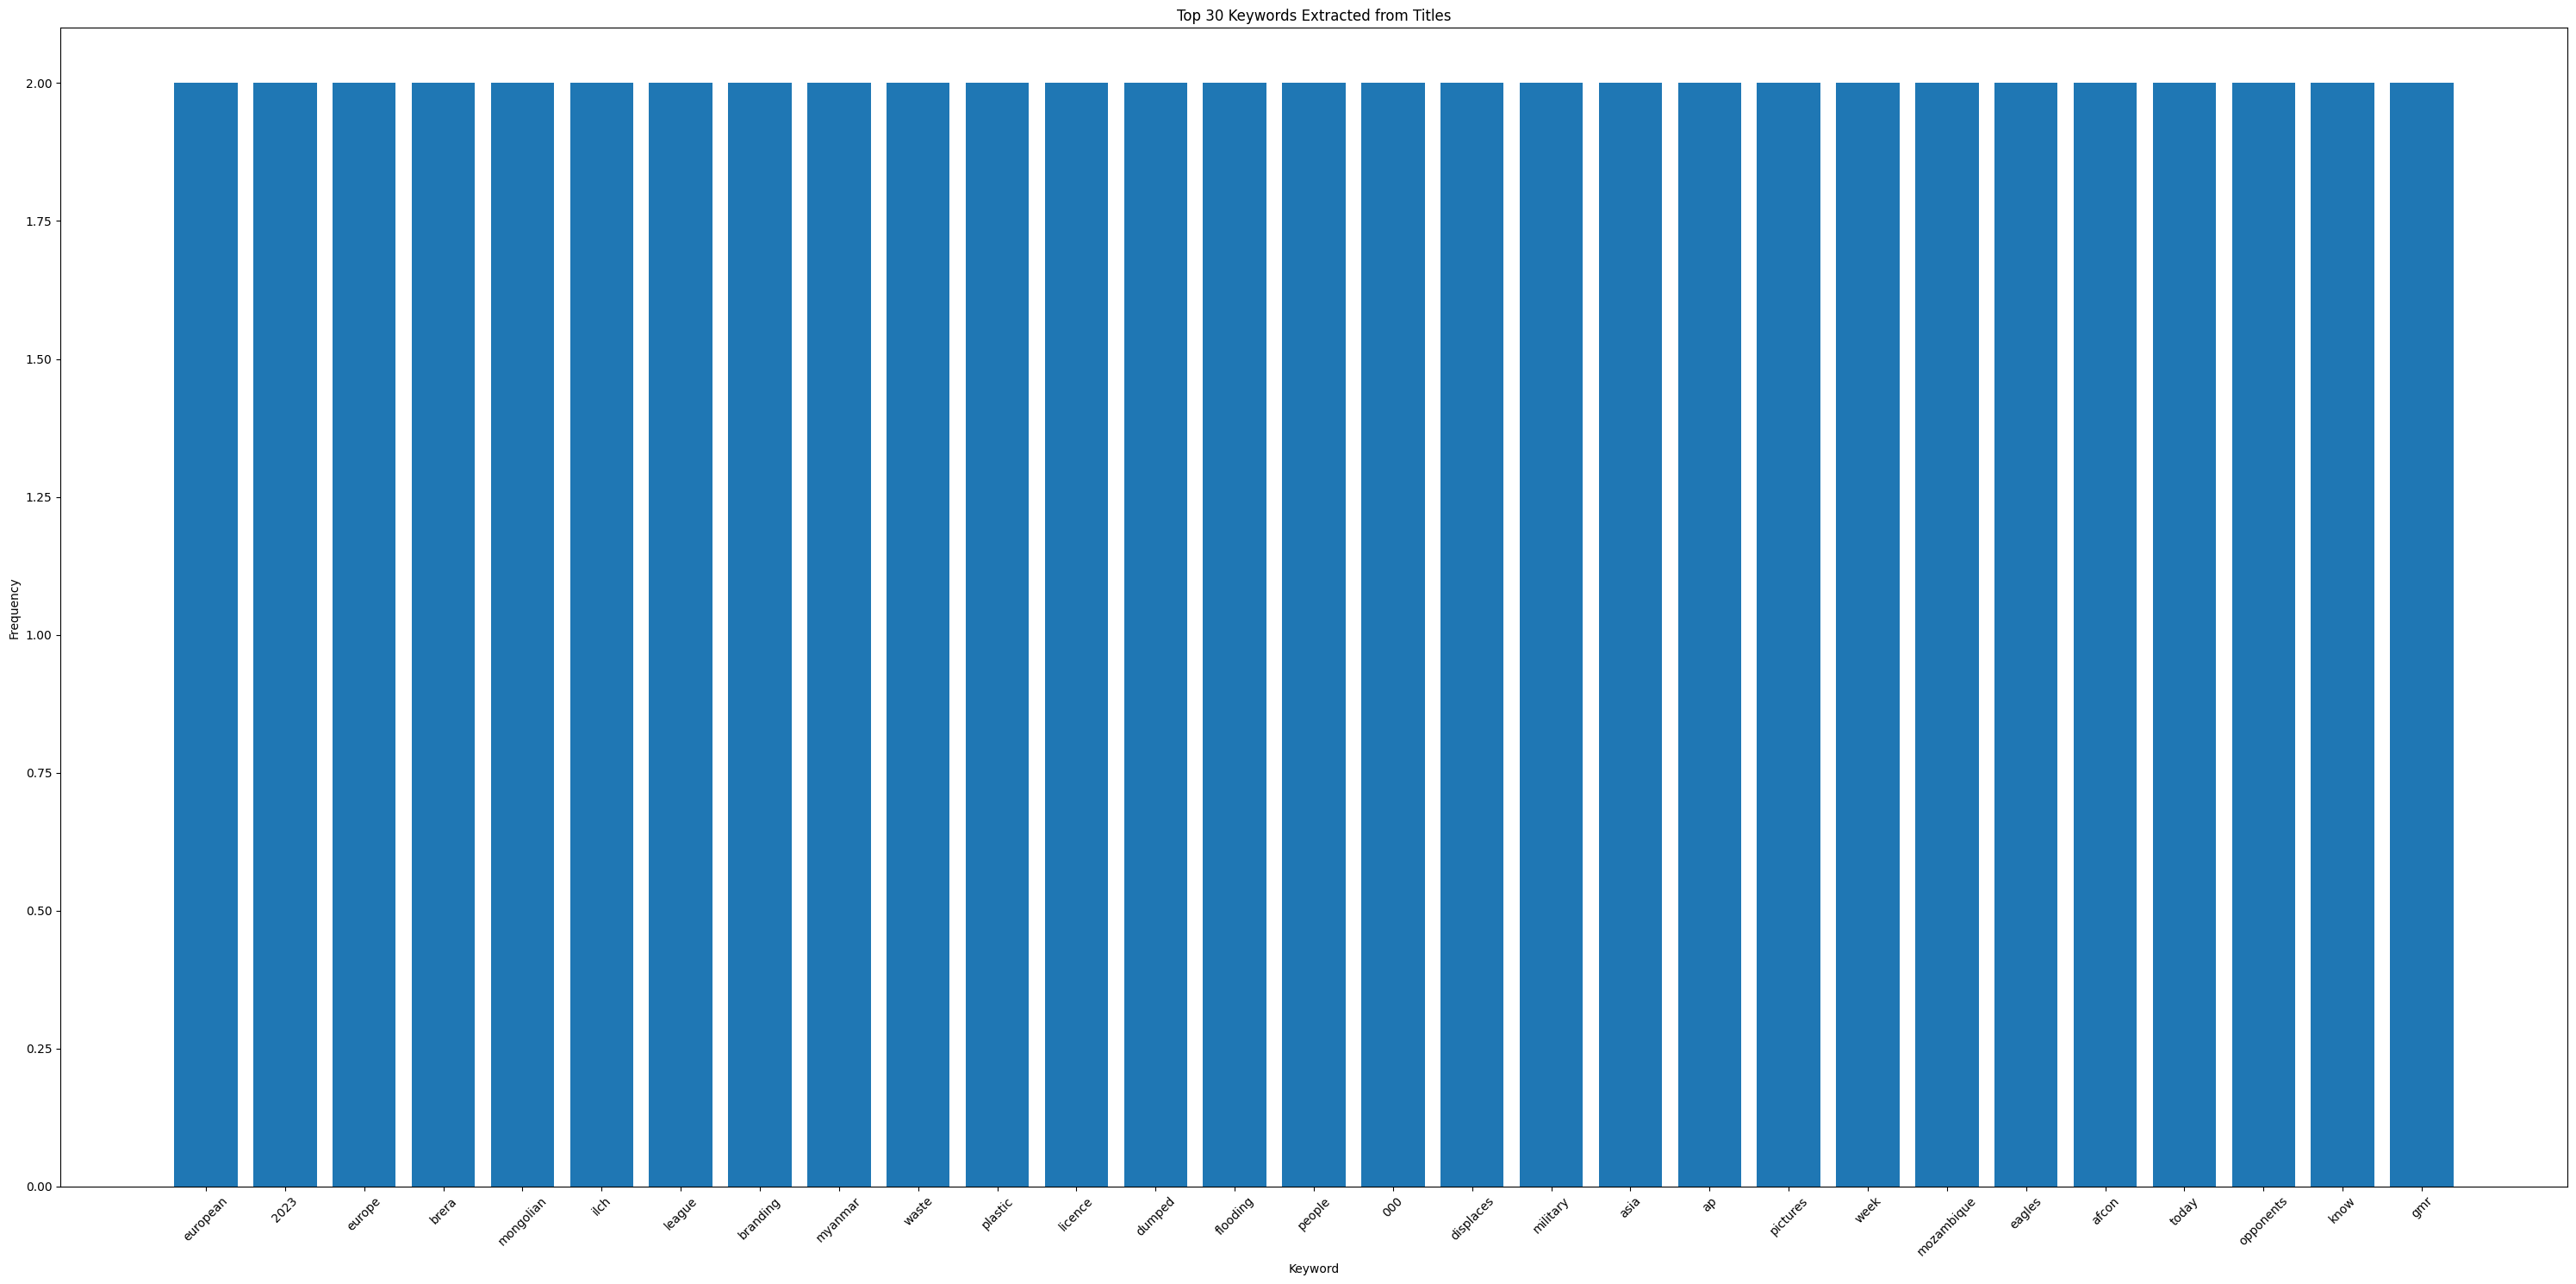

In [22]:
print(sorted_title_keywords)


# Separate keyword-score tuples and frequencies
keywords_with_scores, frequencies = zip(*sorted_title_keywords[:30])
# Extract keywords from keyword-score tuples
keywords = [keyword_score_tuple[0] for keyword_score_tuple in keywords_with_scores]

# Plot the top 10 keywords extracted from titles
plt.figure(figsize=(30, 15))
plt.bar(keywords, frequencies)
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Top 30 Keywords Extracted from Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


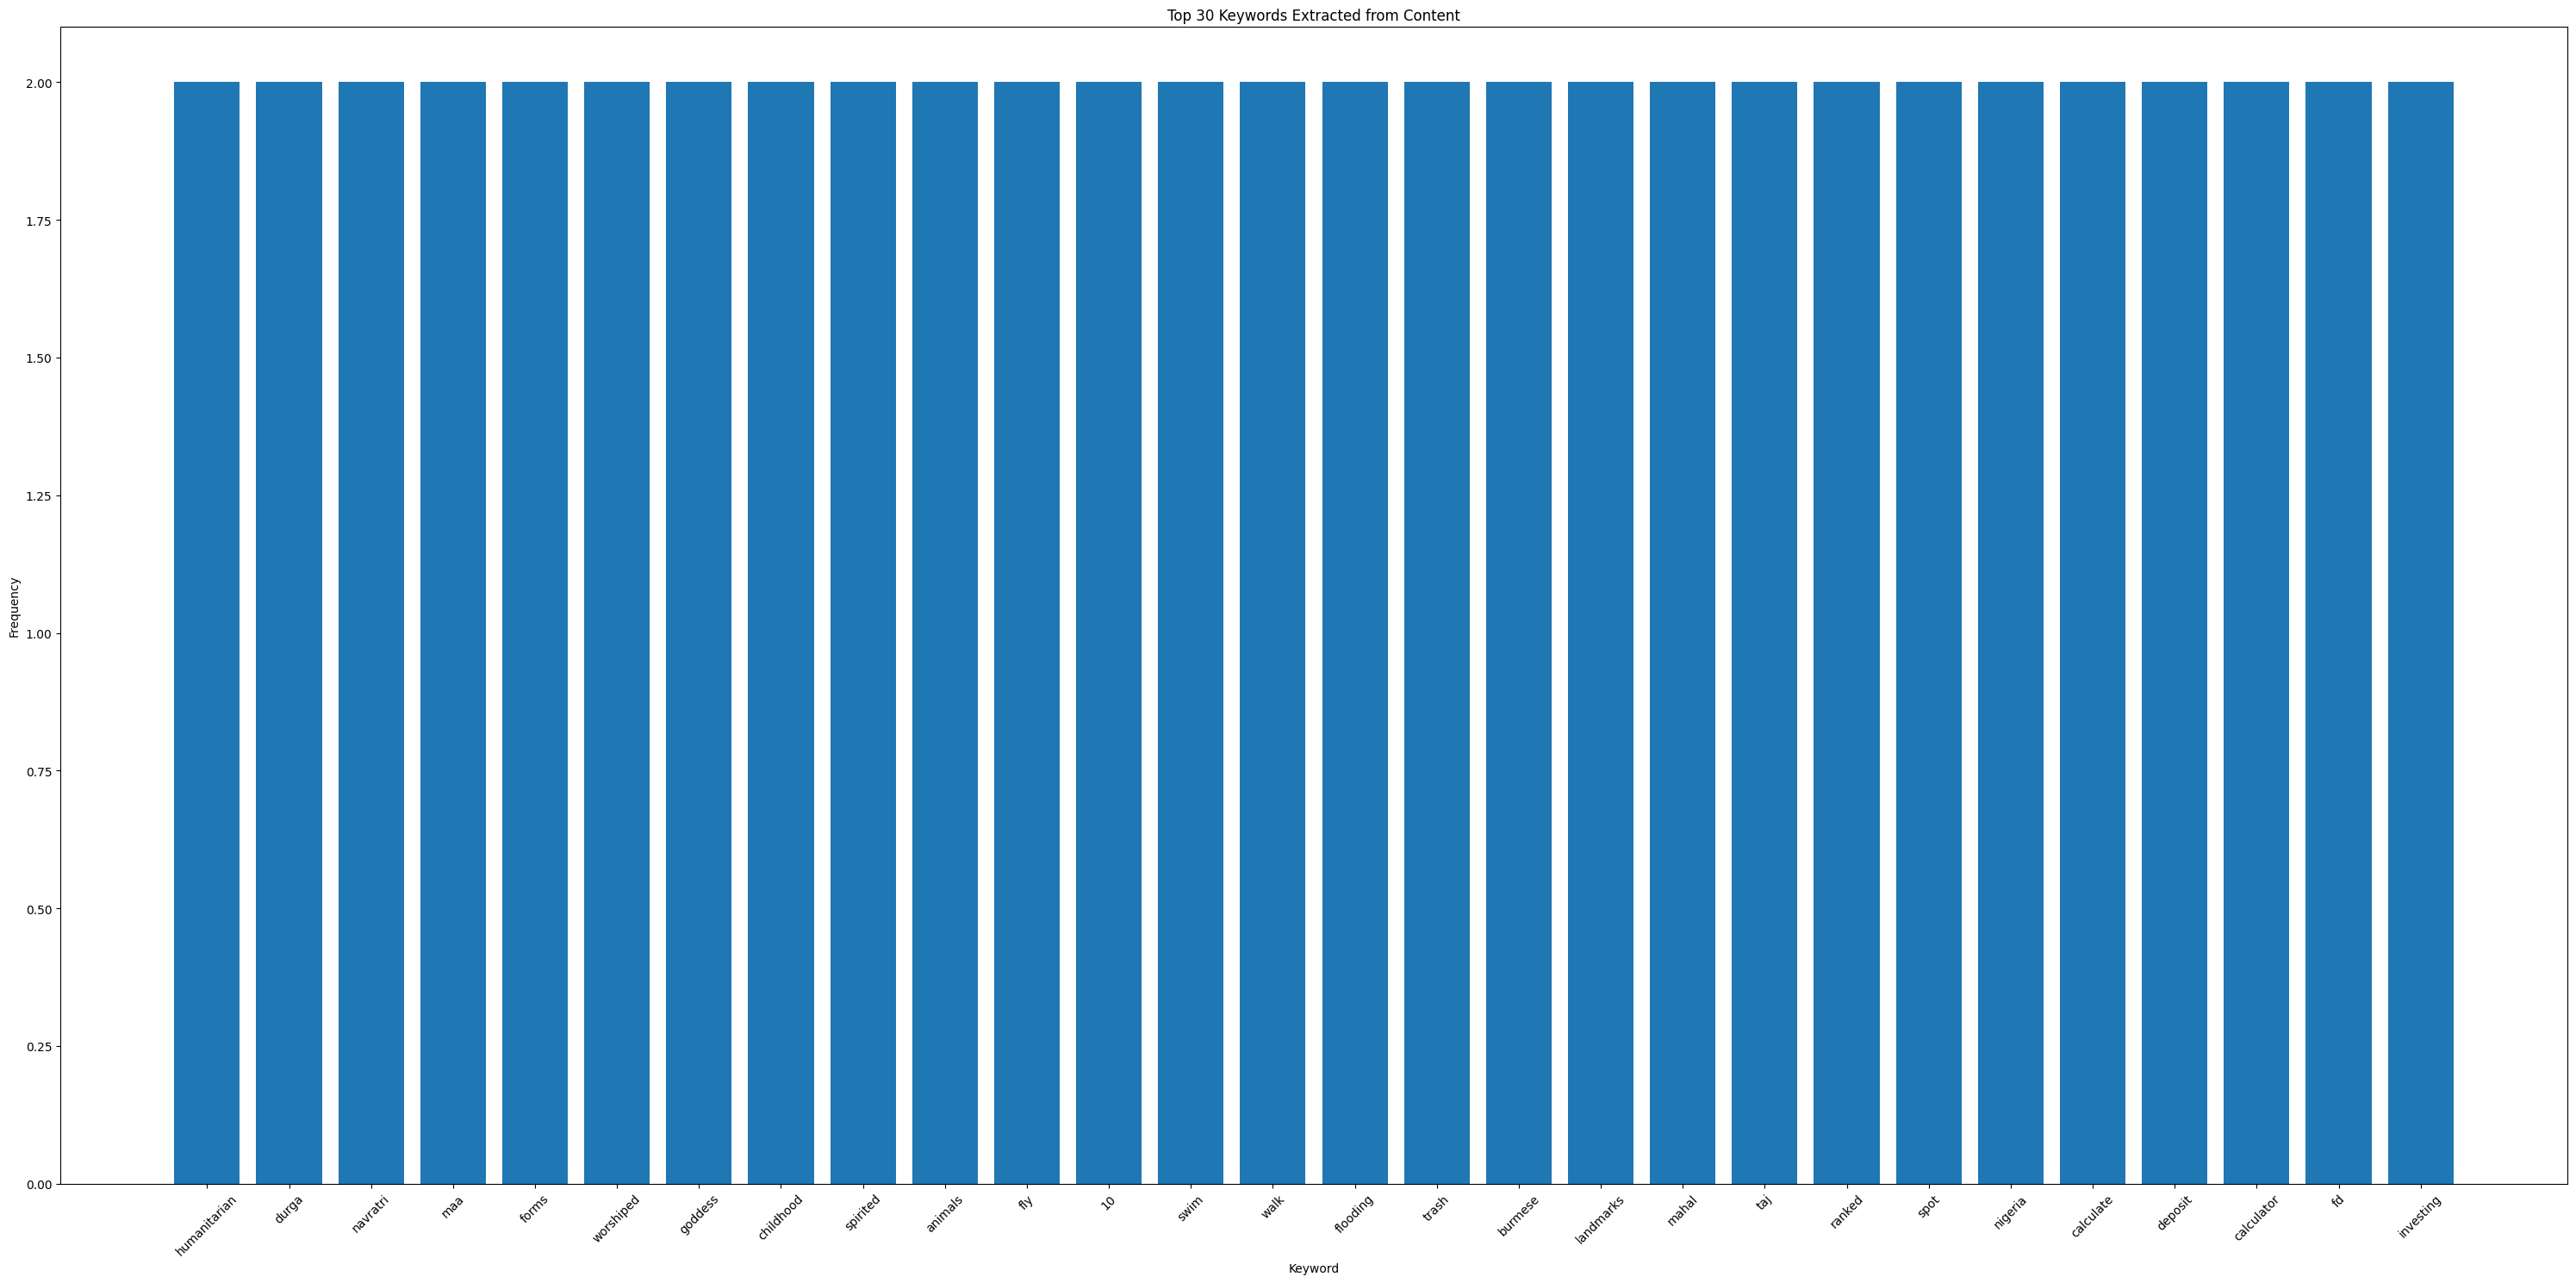

In [23]:
# Separate keyword-score tuples and frequencies
content_keywords_with_scores, content_frequencies = zip(*sorted_content_keywords[:30])
# Extract keywords from keyword-score tuples
content_keywords = [keyword_score_tuple[0] for keyword_score_tuple in content_keywords_with_scores]

# Plot the top 10 keywords extracted from content
plt.figure(figsize=(30, 15))
plt.bar(content_keywords, content_frequencies)
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Top 30 Keywords Extracted from Content')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
